In [1]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [2]:

#filename="/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/23/1482496748.h5"
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/25/1482627609.h5'
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/21/1482359330.h5'

In [3]:
h = katdal.open(filename)

In [4]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/21/1482359330.h5 (version 3.0)
Observer: Fannie  Experiment ID: 20161221-0027
Description: 'Generic Phaseup for all targets'
Observed from 2016-12-22 00:28:55.442 SAST to 2016-12-22 00:33:35.323 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m003,m006,m008,m010,m014,m015,m021,m022,m025,m031,m062,m063  24      312
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m008', 'm003', 'm014', 'm006', 'm063', 'm015', 'm021', 'm010', 'm022', 'm025', 'm031', 'm062']
  spw=0
-------------------------------------------------------------------------------
Shape: (70 dumps, 4096 channe

In [5]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  38
    cal_product_K  ---  39
    cal_product_G  ---  76


In [6]:
np.set_printoptions(precision=4,suppress=True)

In [7]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V162">
[['m003', 'm006', 'm008', 'm010', 'm014', 'm015', 'm021', 'm022', 'm025', 'm031', 'm062', 'm063']]
['m003' 'm006' 'm008' 'm010' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031'
 'm062' 'm063']


# Delays

In [8]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [9]:
k_array.shape #Times,Pols,Antennas

(39, 2, 12)

In [41]:
# print delays (if there are few delays)
print 'POL 0: \n', k_0[0], "\n",k_0[-1]
print 'POL 1: \n', k_1[0],"\n" ,k_1[-1]

POL 0: 
[-283.6145  106.4487   88.8905    5.5363   86.5451  108.5628  486.0116
  538.104     0.      -56.4266   87.9142   85.2978] 
[ 175.5264  106.449    88.91      5.518    86.5603  108.5601  485.9496
  538.0234    0.      -56.3634   87.9217   85.2469]
POL 1: 
[-1628.1187   108.3891    87.9058    97.8341    86.6798   106.8464
   577.1942   535.8009     0.       -56.5439    82.6207    80.0424] 
[  77.3238  108.3559   87.9153   97.7886   86.7009  106.8308  577.1422
  535.7137    0.      -56.5041   82.6284   79.9859]


In [11]:
print labels

['m003' 'm006' 'm008' 'm010' 'm014' 'm015' 'm021' 'm022' 'm025' 'm031'
 'm062' 'm063']


In [12]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

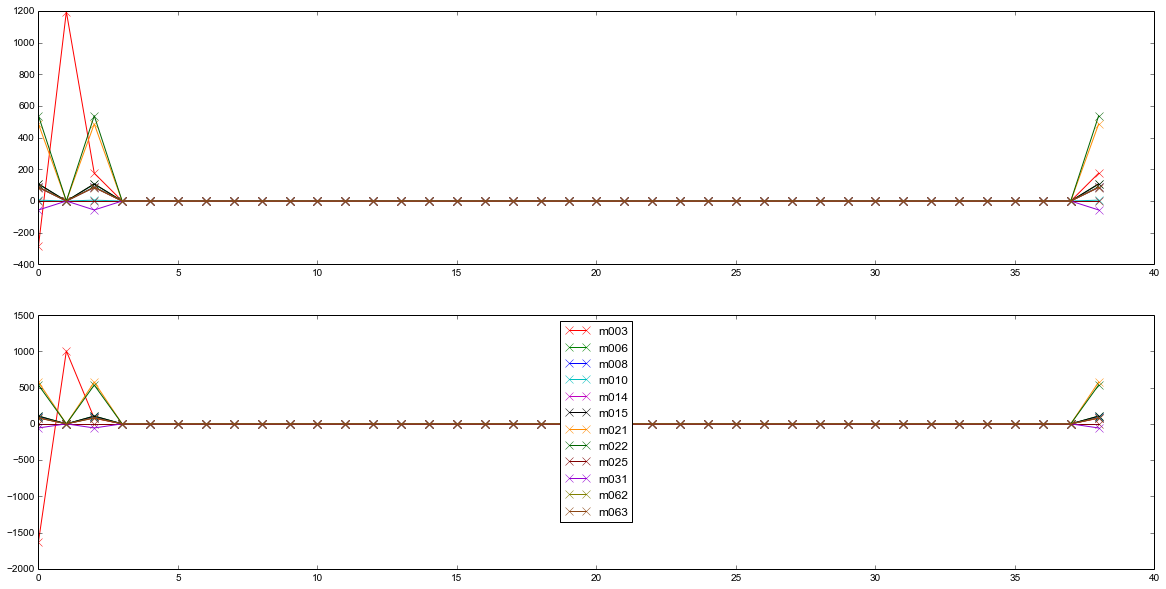

In [36]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')

# Gains

In [14]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(76, 2, 12)


In [15]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 0.9316  1.0412  0.9768  0.9851  0.9805  1.0373  1.0019  1.0289  1.0306
  0.9574  0.9636  0.988 ]
[ 1.0274  0.9661  1.0811  1.0398  0.9505  0.924   1.0736  1.0255  1.0331
  0.9652  1.0131  0.8702]


In [16]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 0.9922  1.0001  1.0021  0.998   1.0023  1.0033  1.0071  1.0102  0.9982
  1.0004  1.0052  0.9976]
[ 0.9959  0.998   1.0011  0.998   1.0006  1.0036  1.0082  1.0119  0.9978
  1.0026  1.0046  0.996 ]


In [17]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 1.065   0.9606  1.026   1.013   1.0222  0.9672  1.0052  0.9819  0.9685
  1.045   1.0432  1.0097]
[ 0.9694  1.033   0.926   0.9598  1.0528  1.0861  0.9391  0.9867  0.9659
  1.0388  0.9916  1.1445]


In [18]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[ 3.9563  4.4928  7.7598  7.3297  7.5411  8.3155  8.9596  7.8284 -0.
  3.5925  8.8143  7.1478]
[ 10.6488   9.7031   6.8493   4.4474   9.9431   9.5347  15.4003  10.118
   0.       3.8641   8.7932  11.3413]


In [19]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[ 14.0661  14.0214  19.1931  19.0435  29.1292  14.4028   7.9759   1.9268
   0.      30.0058  22.827   -3.2579]
[  2.8895  -4.6134  16.5054  12.742   15.7476   0.9308  -0.6184  -6.2541
   0.      12.122   17.3168   4.0535]


In [20]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[ 10.1098   9.5285  11.4333  11.7138  21.5882   6.0873  -0.9836  -5.9016
   0.      26.4132  14.0127 -10.4057]
[ -7.7592 -14.3165   9.6561   8.2946   5.8045  -8.6039 -16.0187 -16.3721
   0.       8.2579   8.5236  -7.2878]


/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


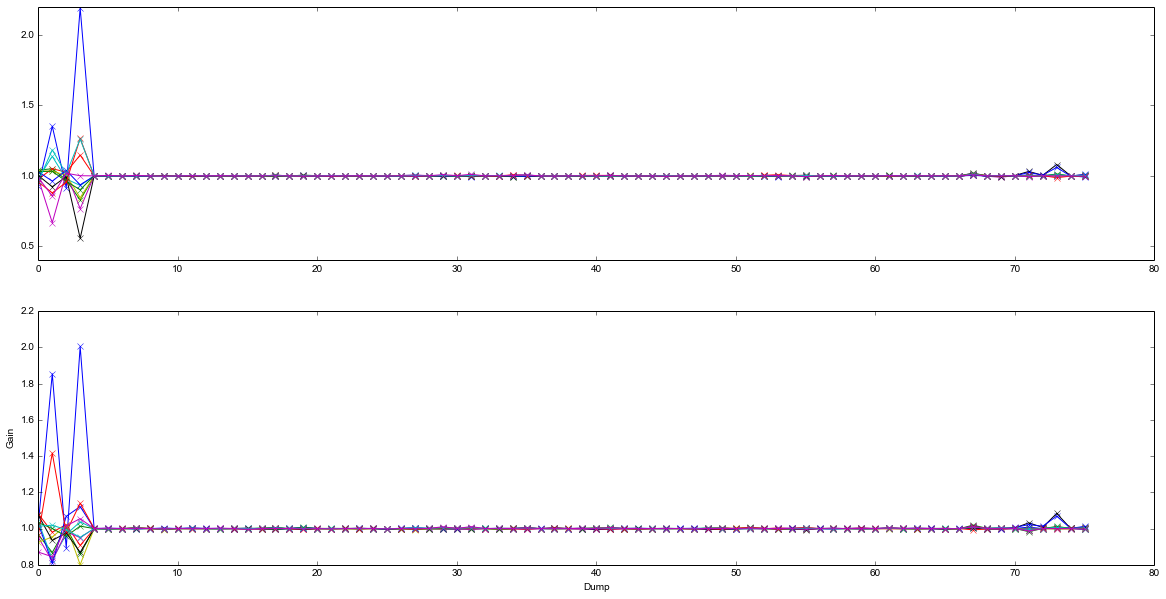

In [21]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

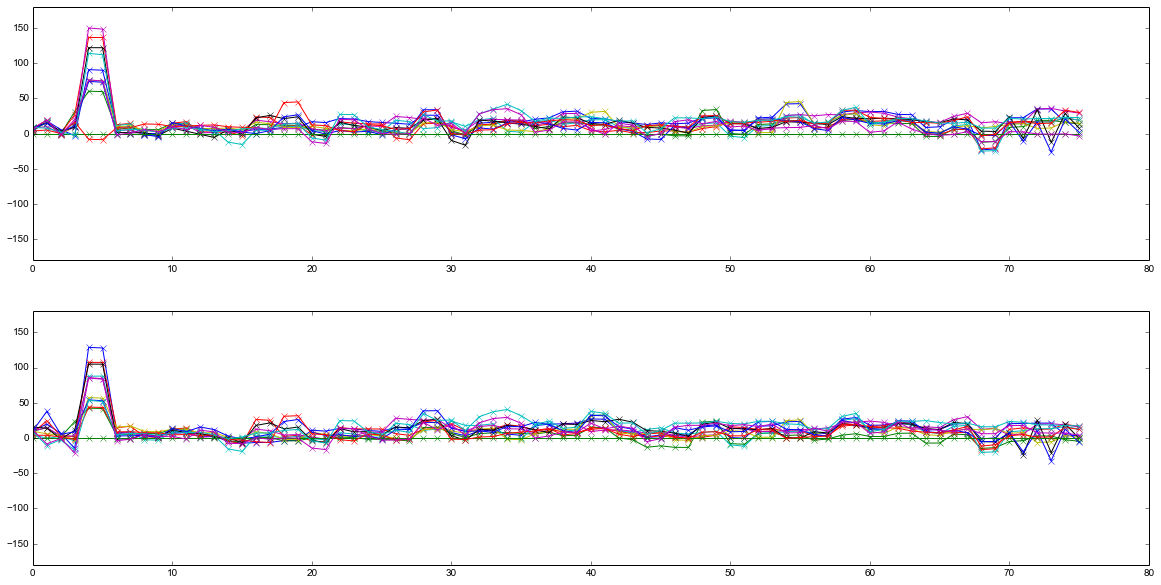

In [22]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [23]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(38, 4096, 2, 12)


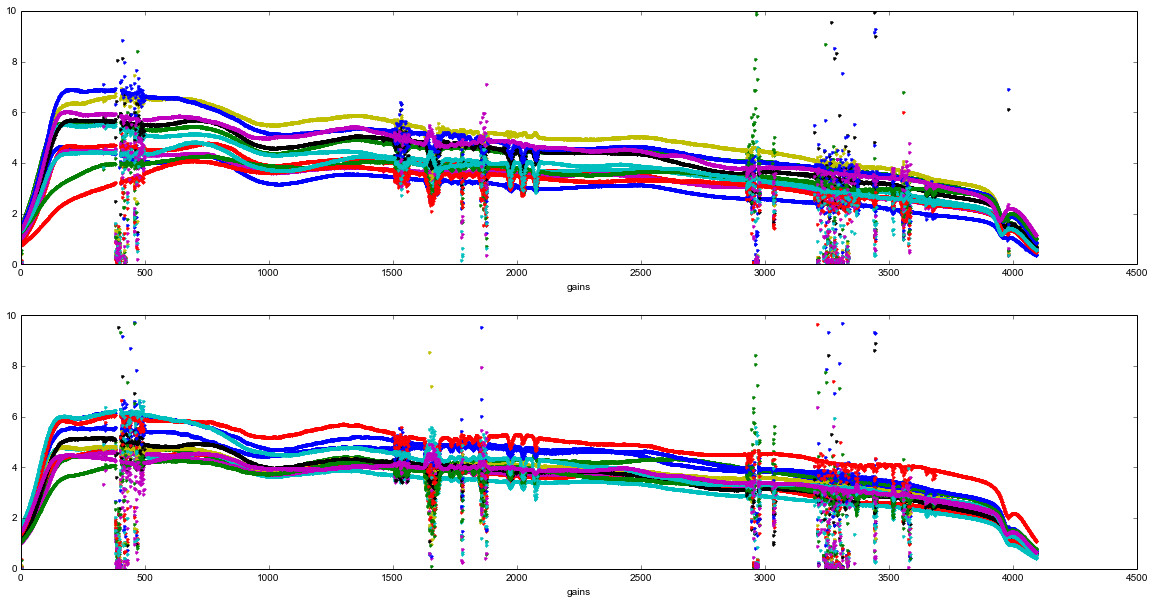

In [24]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

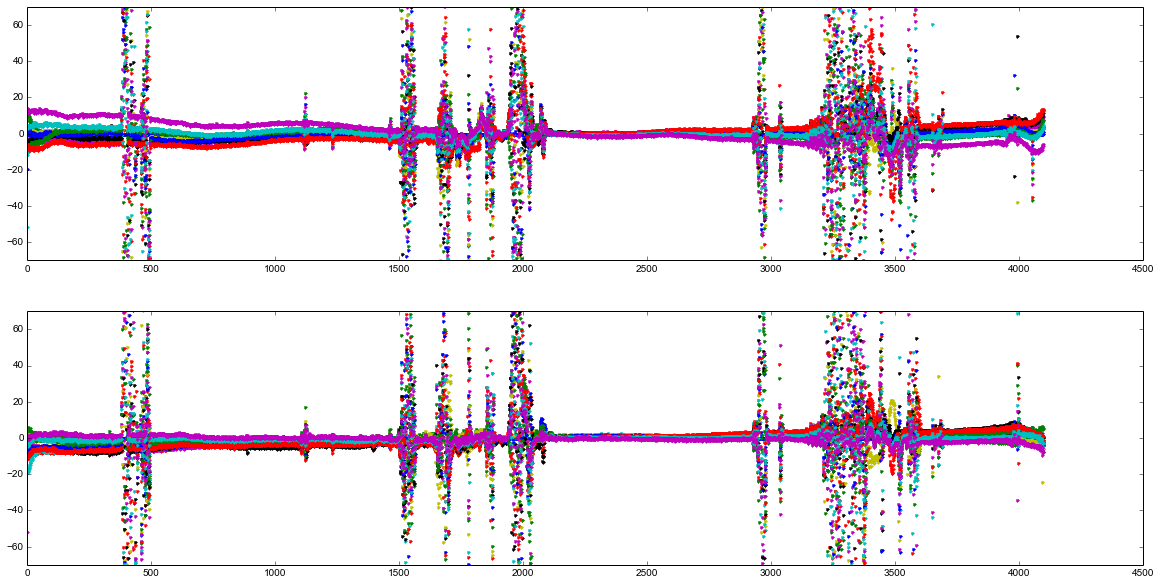

In [25]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
ax[1].set_ylim([-70,70]);

In [26]:
b_array.shape
# Time,channels,pols,antennas

(38, 4096, 2, 12)

In [45]:
#One bandpass at the END
antn=8
b_0_1 = b_array[-1,:,0,antn]
b_1_1 = b_array[-1,:,1,antn]
print b_1_1.shape
print a_array[:,antn]

(4096,)
['m025']


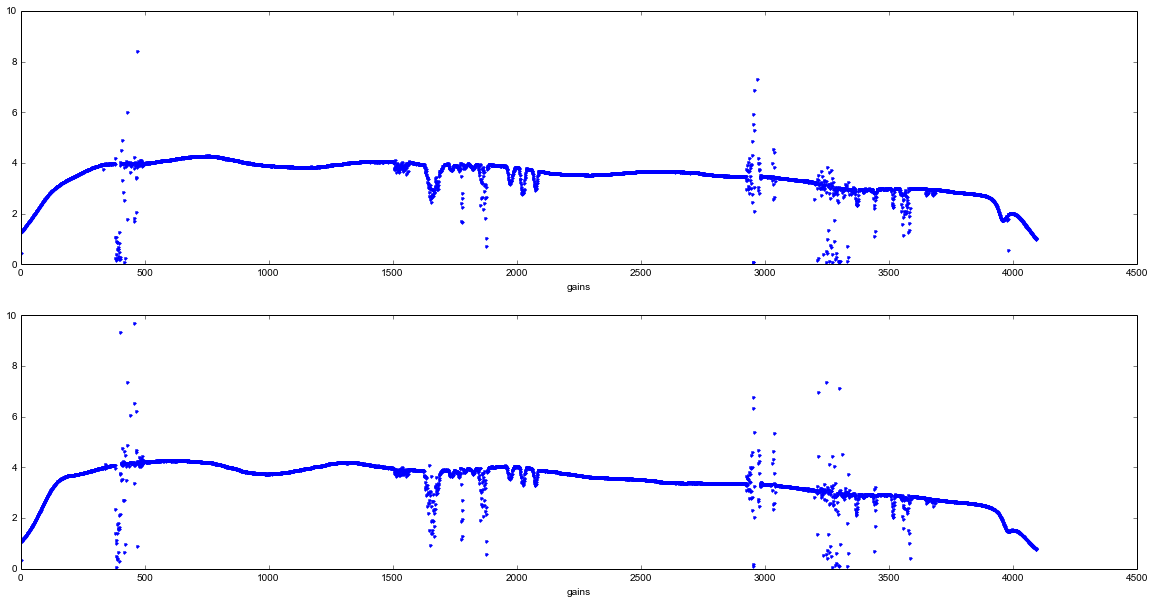

In [46]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

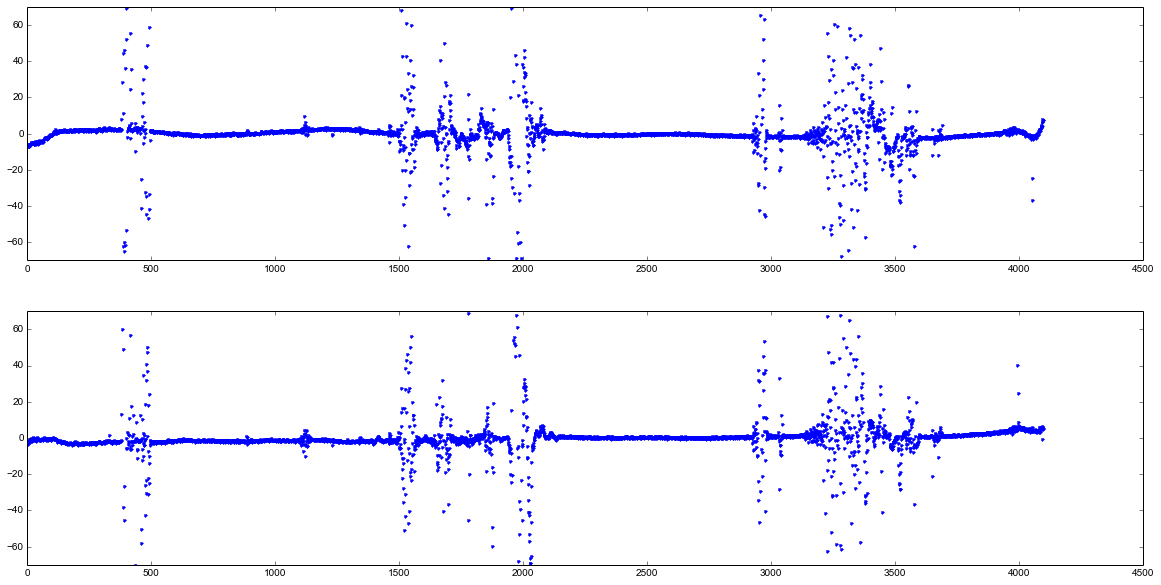

In [47]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);

In [53]:
str(h.catalogue.targets[1])

'PKS 0408-65 (J0408-6545), tags=radec bfcal single_accumulation, 4:08:20.38 -65:45:09.1, flux defined for 800 - 8400 MHz'